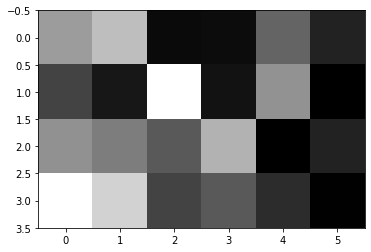

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Create a 2D array representing pixel values (grayscale)
array = np.array([
    [156, 190, 10, 12,100,34],
    [67, 23, 255, 18,146,0],
    [145, 125, 89, 178,0,34],
    [255, 210, 67, 89,45,1]
], dtype=np.uint8)

# Step 3: Use matplotlib to plot the image
plt.imshow(array, cmap='gray', interpolation='nearest')

# Display the image
plt.show()


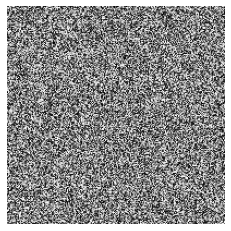

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Create a random 2D array
width = 200
height = 200
array = np.random.randint(0, 255, (height, width), dtype=np.uint8)

# Display the image
plt.imshow(array, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

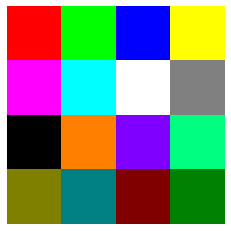

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Create a 3D array representing pixel values (RGB)
array = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0]],
    [[255, 0, 255], [0, 255, 255], [255, 255, 255], [128, 128, 128]],
    [[0, 0, 0], [255, 128, 0], [128, 0, 255], [0, 255, 128]],
    [[128, 128, 0], [0, 128, 128], [128, 0, 0], [0, 128, 0]]
], dtype=np.uint8)

# Step 3: Use matplotlib to plot the image
plt.imshow(array, interpolation='nearest')

# Display the image
plt.axis('off')  # Turn off axis
plt.show()


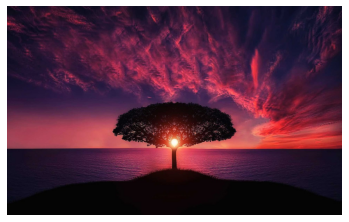

In [27]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

# Example URL of an image
url = 'https://cdn.pixabay.com/photo/2015/04/23/22/00/tree-736885_1280.jpg'
# Download the image
response = requests.get(url)
response.raise_for_status()

# Open the image
image = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()


Enter an image file name: cat.jpg


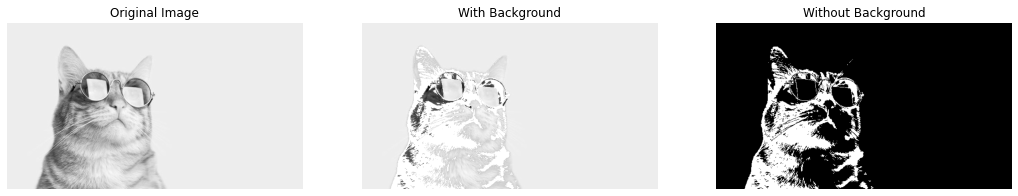

In [49]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_image_file(root_directory):
    filename = input("Enter an image file name: ")
    filepath = os.path.join(root_directory, filename)
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale mode
    if img is None:
        print(f"Error: Unable to read image from file {filepath}")
    return img

def gray_level_slicing(image, low, high, highlight_value=255, background_value=None):
    # Create a copy of the input image to retain unchanged parts
    sliced_image = image.copy()
    
    # Apply gray level slicing
    sliced_image[(image >= low) & (image <= high)] = highlight_value
    
    # If background_value is specified, set pixels outside the range to background_value
    if background_value is not None:
        sliced_image[(image < low) | (image > high)] = background_value
    
    return sliced_image

# Read the image file
image = read_image_file("Images")

# Check if the image was successfully read
if image is not None:
    # Define the range of gray levels to highlight
    low, high = 100, 200

    # Apply gray level slicing without background
    sliced_image_without_background = gray_level_slicing(image, low, high, highlight_value=255, background_value=0)

    # Apply gray level slicing with background
    sliced_image_with_background = gray_level_slicing(image, low, high, highlight_value=255)

    # Display the original and processed images using Matplotlib
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Original image
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title("Original Image")
    axs[0].axis('off')

    # Processed image with gray level slicing and background
    axs[1].imshow(sliced_image_with_background, cmap='gray')
    axs[1].set_title("With Background")
    axs[1].axis('off')

    # Processed image with gray level slicing without background
    axs[2].imshow(sliced_image_without_background, cmap='gray')
    axs[2].set_title("Without Background")
    axs[2].axis('off')

    plt.show()
else:
    print("Failed to read the image. Please check the file path and try again.")
